<a href="https://colab.research.google.com/github/farhanarnob/PhenoGeneRankerArnob/blob/main/adni_merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MaxAbsScaler
from matplotlib.colors import ListedColormap

In [12]:
# Read adni merge raw
adni_merge_raw = pd.read_csv('/content/drive/MyDrive/myself/UNT/sem one/individual research/project/PhenoGeneRankerArnob/database/adni_merge/ADNIMERGE.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (19,20,21,104,105,106) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
adni_merge_raw.shape

(16220, 116)

In [14]:
adni_merge_raw.head(10)

,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,...,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,ADNI1,ADNI1,011_S_0002,11,bl,2005-09-08,CN,74.3,Male,...,NaN,1.33615,NaN,NaN,NaN,0.000000,0.00000,0,0,2022-10-26 04:58:48.0
1,3,ADNI1,ADNI1,011_S_0003,11,bl,2005-09-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.000000,0.00000,0,0,2022-10-26 04:58:48.0
2,3,ADNI1,ADNI1,011_S_0003,11,m06,2006-03-13,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.498289,5.96721,6,6,2022-10-26 04:58:48.0
3,3,ADNI1,ADNI1,011_S_0003,11,m12,2006-09-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.999316,11.96720,12,12,2022-10-26 04:58:48.0
4,3,ADNI1,ADNI1,011_S_0003,11,m24,2007-09-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,1.998630,23.93440,24,24,2022-10-26 04:58:48.0
5,4,ADNI1,ADNI1,022_S_0004,22,bl,2005-11-08,LMCI,67.5,Male,...,13.29,NaN,NaN,NaN,NaN,0.000000,0.00000,0,0,2022-07-19 05:01:40.0
6,4,ADNI1,ADNI1,022_S_0004,22,m06,2006-05-02,LMCI,67.5,Male,...,13.29,NaN,NaN,NaN,NaN,0.479124,5.73770,6,6,2022-07-19 05:01:40.0
7,4,ADNI1,ADNI1,022_S_0004,22,m12,2006-11-14,LMCI,67.5,Male,...,13.29,NaN,NaN,NaN,NaN,1.015740,12.16390,12,12,2022-07-19 05:01:40.0
8,4,ADNI1,ADNI1,022_S_0004,22,m18,2007-05-14,LMCI,67.5,Male,...,13.29,NaN,NaN,NaN,NaN,1.511290,18.09840,18,18,2022-07-19 05:01:40.0
9,4,ADNI1,ADNI1,022_S_0004,22,m36,2008-11-18,LMCI,67.5,Male,...,13.29,NaN,NaN,NaN,NaN,3.028060,36.26230,36,36,2022-07-19 05:01:40.0


In [15]:
# print dataframe shape
adni_merge = adni_merge_raw
print("Dataframe shape:", adni_merge.shape)

Dataframe shape: (16220, 116)


In [20]:
adni_merge_fileter = adni_merge[adni_merge['VISCODE'] == "bl"]
adni_merge_fileter = adni_merge[adni_merge['DX_bl'] == "AD"] 
adni_merge_fileter.shape

(1738, 116)

In [24]:
adni_merge_fileter_cog = adni_merge_fileter[["CDRSB", "ADAS11","ADAS13","ADASQ4","MMSE","RAVLT_immediate","RAVLT_learning","RAVLT_forgetting","RAVLT_perc_forgetting","TRABSCOR","FAQ"]]
adni_merge_fileter_cog.shape

(1738, 11)

In [25]:
adni_merge_fileter_cog.head()

,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,TRABSCOR,FAQ
1,4.5,22.00,31.00,8.0,20.0,22.0,1.0,4.0,100.0,148.0,10.0
2,6.0,19.00,30.00,10.0,24.0,19.0,2.0,6.0,100.0,135.0,12.0
3,3.5,24.00,35.00,10.0,17.0,31.0,2.0,7.0,100.0,126.0,17.0
4,8.0,25.67,37.67,10.0,19.0,23.0,1.0,5.0,100.0,275.0,14.0
20,6.0,27.33,40.33,10.0,20.0,17.0,2.0,3.0,75.0,300.0,17.0


In [27]:
# define standard scaler
scaler = MaxAbsScaler()
scaler.fit(adni_merge_fileter_cog)
scaled = scaler.transform(adni_merge_fileter_cog)
adni_merge_fileter_cog_normed = pd.DataFrame(scaled, columns=adni_merge_fileter_cog.columns)
adni_merge_fileter_cog_normed.head()

,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,TRABSCOR,FAQ
0,0.250000,0.314286,0.397436,0.8,0.666667,0.431373,0.125,0.148148,0.148148,0.483660,0.333333
1,0.333333,0.271429,0.384615,1.0,0.800000,0.372549,0.250,0.222222,0.148148,0.441176,0.400000
2,0.194444,0.342857,0.448718,1.0,0.566667,0.607843,0.250,0.259259,0.148148,0.411765,0.566667
3,0.444444,0.366714,0.482949,1.0,0.633333,0.450980,0.125,0.185185,0.148148,0.898693,0.466667
4,0.333333,0.390429,0.517051,1.0,0.666667,0.333333,0.250,0.111111,0.111111,0.980392,0.566667


In [28]:
adni_merge_fileter_cog_normed_corr = adni_merge_fileter_cog_normed.corr()
adni_merge_fileter_cog_normed_corr

,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,TRABSCOR,FAQ
CDRSB,1.000000,0.624587,0.600266,0.275321,-0.640044,-0.403899,-0.155847,-0.210550,0.107386,0.307333,0.715342
ADAS11,0.624587,1.000000,0.986512,0.428127,-0.767054,-0.668843,-0.235209,-0.381388,0.151201,0.342101,0.511094
ADAS13,0.600266,0.986512,1.000000,0.530801,-0.743711,-0.685063,-0.258834,-0.372823,0.172031,0.374968,0.517514
ADASQ4,0.275321,0.428127,0.530801,1.000000,-0.342236,-0.398964,-0.303005,-0.086304,0.278936,0.110891,0.281987
MMSE,-0.640044,-0.767054,-0.743711,-0.342236,1.000000,0.554401,0.204416,0.332338,-0.110074,-0.353961,-0.478178
RAVLT_immediate,-0.403899,-0.668843,-0.685063,-0.398964,0.554401,1.000000,0.359868,0.573213,-0.190409,-0.385529,-0.345021
RAVLT_learning,-0.155847,-0.235209,-0.258834,-0.303005,0.204416,0.359868,1.000000,0.437573,-0.113885,-0.074982,-0.140870
RAVLT_forgetting,-0.210550,-0.381388,-0.372823,-0.086304,0.332338,0.573213,0.437573,1.000000,0.622948,-0.226910,-0.169474
RAVLT_perc_forgetting,0.107386,0.151201,0.172031,0.278936,-0.110074,-0.190409,-0.113885,0.622948,1.000000,0.062146,0.118511
TRABSCOR,0.307333,0.342101,0.374968,0.110891,-0.353961,-0.385529,-0.074982,-0.226910,0.062146,1.000000,0.297670


In [30]:
adni_merge_fileter_cog_normed_corr_abs = adni_merge_fileter_cog_normed_corr.abs()
adni_merge_fileter_cog_normed_corr_abs.shape

(11, 11)

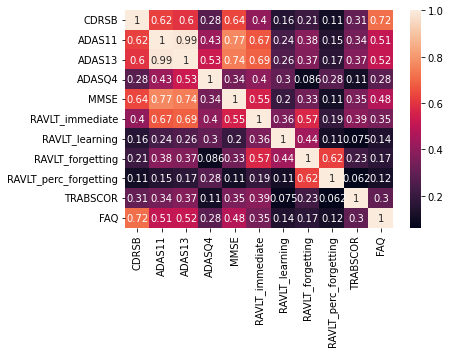

In [32]:
sns.heatmap(adni_merge_fileter_cog_normed_corr_abs, annot=True)
plt.show()

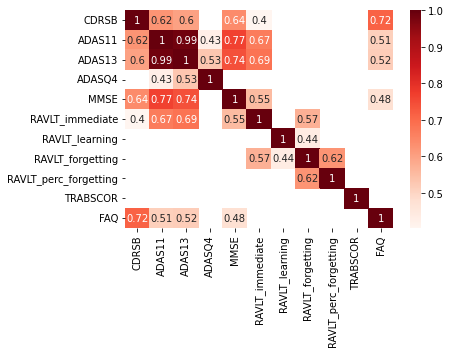

In [43]:
adni_merge_fileter_cog_normed_corr_abs_4 = adni_merge_fileter_cog_normed_corr_abs[adni_merge_fileter_cog_normed_corr_abs >= 0.4]
sns.heatmap(adni_merge_fileter_cog_normed_corr_abs_4, annot=True,cmap=plt.cm.get_cmap("Reds"))
plt.show()

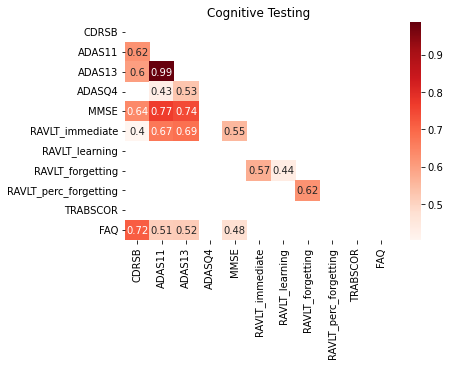

In [69]:
# will use as cog head map

adni_merge_fileter_cog_normed_corr_abs_4 = adni_merge_fileter_cog_normed_corr_abs[adni_merge_fileter_cog_normed_corr_abs >= 0.4]
mask = np.triu(np.ones_like(adni_merge_fileter_cog_normed_corr_abs_4))
ax = plt.axes()
ax.set_title('Cognitive Testing')
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(adni_merge_fileter_cog_normed_corr_abs_4, cmap=plt.cm.get_cmap("Reds"), annot=True, mask=mask)
# displaying heatmap
plt.show()

In [56]:
# will save as cog pheno layer 1

adni_merge_fileter_cog_normed_corr_abs_4_lower = adni_merge_fileter_cog_normed_corr_abs_4.mask(np.triu(np.ones(adni_merge_fileter_cog_normed_corr_abs_4.shape)).astype(bool)).stack().reset_index()
adni_merge_fileter_cog_normed_corr_abs_4_lower = adni_merge_fileter_cog_normed_corr_abs_4_lower.rename(columns={'level_0': 'from','level_1': 'to',0:"weight"})

adni_merge_fileter_cog_normed_corr_abs_4_lower

,from,to,weight
0,ADAS11,CDRSB,0.624587
1,ADAS13,CDRSB,0.600266
2,ADAS13,ADAS11,0.986512
3,ADASQ4,ADAS11,0.428127
4,ADASQ4,ADAS13,0.530801
5,MMSE,CDRSB,0.640044
6,MMSE,ADAS11,0.767054
7,MMSE,ADAS13,0.743711
8,RAVLT_immediate,CDRSB,0.403899
9,RAVLT_immediate,ADAS11,0.668843


In [51]:
adni_merge_fileter_cog_normed_corr_abs_4.where(pd.np.triu(pd.np.ones(adni_merge_fileter_cog_normed_corr_abs_4.shape), k=1).astype(bool)).stack().reset_index()

<ipython-input-51-9932552a7e1e>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  adni_merge_fileter_cog_normed_corr_abs_4.where(pd.np.triu(pd.np.ones(adni_merge_fileter_cog_normed_corr_abs_4.shape), k=1).astype(bool)).stack().reset_index()


,level_0,level_1,0
0,CDRSB,ADAS11,0.624587
1,CDRSB,ADAS13,0.600266
2,CDRSB,MMSE,0.640044
3,CDRSB,RAVLT_immediate,0.403899
4,CDRSB,FAQ,0.715342
5,ADAS11,ADAS13,0.986512
6,ADAS11,ADASQ4,0.428127
7,ADAS11,MMSE,0.767054
8,ADAS11,RAVLT_immediate,0.668843
9,ADAS11,FAQ,0.511094


In [52]:
adni_merge_fileter_cog_normed_corr_abs_4_u_gene_co = adni_merge_fileter_cog_normed_corr_abs_4.where(pd.np.triu(pd.np.ones(adni_merge_fileter_cog_normed_corr_abs_4.shape), k=1).astype(bool)).stack().reset_index()

<ipython-input-52-a8502ebb08bb>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  adni_merge_fileter_cog_normed_corr_abs_4_u_gene_co = adni_merge_fileter_cog_normed_corr_abs_4.where(pd.np.triu(pd.np.ones(adni_merge_fileter_cog_normed_corr_abs_4.shape), k=1).astype(bool)).stack().reset_index()


In [55]:
adni_merge_fileter_cog_normed_corr_abs_4_u_gene_co.head(50)

,level_0,level_1,0
0,CDRSB,ADAS11,0.624587
1,CDRSB,ADAS13,0.600266
2,CDRSB,MMSE,0.640044
3,CDRSB,RAVLT_immediate,0.403899
4,CDRSB,FAQ,0.715342
5,ADAS11,ADAS13,0.986512
6,ADAS11,ADASQ4,0.428127
7,ADAS11,MMSE,0.767054
8,ADAS11,RAVLT_immediate,0.668843
9,ADAS11,FAQ,0.511094


In [57]:
adni_merge_fileter_cog_normed_corr_abs_4_lower.to_csv('/content/drive/MyDrive/myself/UNT/sem one/individual research/project/PhenoGeneRankerArnob/database/adni_merge/adni_merge_fileter_cog_normed_corr_abs_4_lower.csv',index = False)


In [58]:
adni_merge_filter_neoro = adni_merge_fileter[["Hippocampus", "WholeBrain","Entorhinal","Fusiform","MidTemp","RAVLT_immediate","ICV"]]
adni_merge_filter_neoro.shape

(1738, 7)

In [59]:
# define standard scaler
scaler = MaxAbsScaler()
scaler.fit(adni_merge_filter_neoro)
scaled = scaler.transform(adni_merge_filter_neoro)
adni_merge_filter_neoro_normed = pd.DataFrame(scaled, columns=adni_merge_filter_neoro.columns)
adni_merge_filter_neoro_normed.head()

,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,RAVLT_immediate,ICV
0,0.536839,0.827902,0.305267,0.660814,0.645887,0.431373,0.579357
1,0.549657,0.806088,0.413670,0.613680,0.595049,0.372549,0.575056
2,0.520488,0.802849,0.272030,0.622928,0.607601,0.607843,0.574268
3,0.518672,0.797661,0.200273,0.598040,0.574925,0.450980,0.574148
4,0.679148,0.641756,0.349412,0.514085,0.539023,0.333333,0.408276


In [60]:
adni_merge_filter_neoro_normed_corr = adni_merge_filter_neoro_normed.corr()
adni_merge_filter_neoro_normed_corr

,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,RAVLT_immediate,ICV
Hippocampus,1.000000,0.581490,0.649700,0.437986,0.486641,0.147836,0.393062
WholeBrain,0.581490,1.000000,0.491808,0.706951,0.768558,0.108454,0.741701
Entorhinal,0.649700,0.491808,1.000000,0.550956,0.443963,0.186986,0.336854
Fusiform,0.437986,0.706951,0.550956,1.000000,0.711351,0.241237,0.495145
MidTemp,0.486641,0.768558,0.443963,0.711351,1.000000,0.290471,0.530708
RAVLT_immediate,0.147836,0.108454,0.186986,0.241237,0.290471,1.000000,-0.029562
ICV,0.393062,0.741701,0.336854,0.495145,0.530708,-0.029562,1.000000


In [62]:
adni_merge_filter_neoro_normed_corr_abs = adni_merge_filter_neoro_normed_corr.abs()
adni_merge_filter_neoro_normed_corr_abs

,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,RAVLT_immediate,ICV
Hippocampus,1.000000,0.581490,0.649700,0.437986,0.486641,0.147836,0.393062
WholeBrain,0.581490,1.000000,0.491808,0.706951,0.768558,0.108454,0.741701
Entorhinal,0.649700,0.491808,1.000000,0.550956,0.443963,0.186986,0.336854
Fusiform,0.437986,0.706951,0.550956,1.000000,0.711351,0.241237,0.495145
MidTemp,0.486641,0.768558,0.443963,0.711351,1.000000,0.290471,0.530708
RAVLT_immediate,0.147836,0.108454,0.186986,0.241237,0.290471,1.000000,0.029562
ICV,0.393062,0.741701,0.336854,0.495145,0.530708,0.029562,1.000000


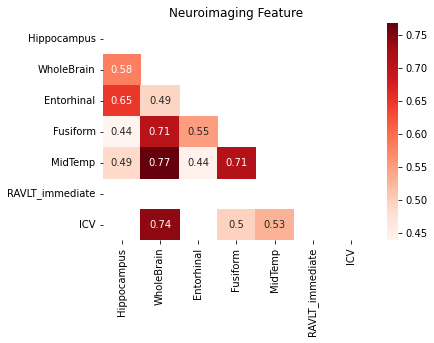

In [70]:
adni_merge_filter_neoro_normed_corr_abs_4 = adni_merge_filter_neoro_normed_corr_abs[adni_merge_filter_neoro_normed_corr_abs >= 0.4]
mask = np.triu(np.ones_like(adni_merge_filter_neoro_normed_corr_abs_4))
# plotting a triangle correlation heatmap
ax = plt.axes()
ax.set_title('Neuroimaging Feature')
dataplot = sns.heatmap(adni_merge_filter_neoro_normed_corr_abs_4, cmap=plt.cm.get_cmap("Reds"), annot=True, mask=mask)
# displaying heatmap
plt.show()

In [67]:
# will save as cog pheno layer 1

adni_merge_filter_neoro_normed_corr_abs_4_lower = adni_merge_filter_neoro_normed_corr_abs_4.mask(np.triu(np.ones(adni_merge_filter_neoro_normed_corr_abs_4.shape)).astype(bool)).stack().reset_index()
adni_merge_filter_neoro_normed_corr_abs_4_lower = adni_merge_filter_neoro_normed_corr_abs_4_lower.rename(columns={'level_0': 'from','level_1': 'to',0:"weight"})

adni_merge_filter_neoro_normed_corr_abs_4_lower

,from,to,weight
0,WholeBrain,Hippocampus,0.581490
1,Entorhinal,Hippocampus,0.649700
2,Entorhinal,WholeBrain,0.491808
3,Fusiform,Hippocampus,0.437986
4,Fusiform,WholeBrain,0.706951
5,Fusiform,Entorhinal,0.550956
6,MidTemp,Hippocampus,0.486641
7,MidTemp,WholeBrain,0.768558
8,MidTemp,Entorhinal,0.443963
9,MidTemp,Fusiform,0.711351


In [68]:
adni_merge_filter_neoro_normed_corr_abs_4_lower.to_csv('/content/drive/MyDrive/myself/UNT/sem one/individual research/project/PhenoGeneRankerArnob/database/adni_merge/adni_merge_filter_neoro_normed_corr_abs_4_lower.csv',index = False)
